In [ ]:
import pandas as pd
import imblearn
from collections import Counter
data = pd.read_csv('new_dataset_with_label.csv',index_col=0)

In [ ]:
data.iloc[:2339,:-1]

,total_time,compiled,compiled successfully,ran_tests,test_results,modified,add_lines,change,remove_lines,cps,paste_lines,max_pastes,average_test_results,avg_paste
Student,,,,,,,,,,,,,,
A2016\student1013,6894752.0,1441.0,1116.0,689.0,1349.0,38441.0,12365.0,32597.0,2023.0,0.003436,5202.0,120.0,1.957910,4.553441
A2016\student1016,37440.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,8.0,0.000000,NaN,NaN,NaN,NaN
A2016\student1021,9363152.0,2108.0,1278.0,787.0,1605.0,58550.0,19160.0,49003.0,6105.0,0.003997,7270.0,162.0,2.039390,5.147455
A2016\student1029,6949656.0,1775.0,1201.0,852.0,754.0,36461.0,15605.0,30332.0,2683.0,0.005040,7235.0,165.0,0.884977,4.840774
A2016\student1066,2784368.0,338.0,223.0,449.0,810.0,13924.0,6140.0,12169.0,369.0,0.004970,3988.0,139.0,1.804009,3.470160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B2016\student9946,2989136.0,311.0,127.0,220.0,335.0,15501.0,12362.0,13196.0,1776.0,0.017313,9610.0,315.0,1.522727,5.385016
B2016\student9949,7787496.0,1961.0,1199.0,588.0,468.0,39601.0,9607.0,30431.0,3452.0,0.002364,3735.0,347.0,0.795918,4.929317
B2016\student9972,12352640.0,5669.0,3568.0,973.0,612.0,55655.0,20719.0,47870.0,3707.0,0.004338,11067.0,232.0,0.628983,4.842414


In [ ]:
data = data.fillna(0)
data["Label"] =data["Label"].astype("int64")
x = data.iloc[:2339,:-1]
y = data.iloc[:2339,-1]

C:\Users\Keerthana\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Not plagiarised'), Text(1, 0, 'plagiarised')]

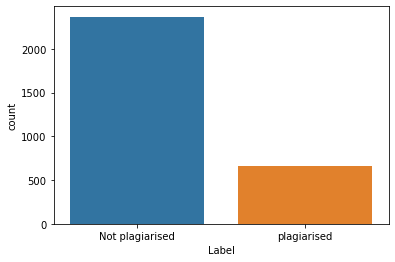

In [ ]:
import seaborn as sns
g = sns.countplot(data['Label'])
g.set_xticklabels(['Not plagiarised','plagiarised'])

In [ ]:
len(x)

2339

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train,Y_train)

In [ ]:
smote_enn = imblearn.combine.SMOTEENN(random_state=0,sampling_strategy='minority')
x_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train,Y_train)
print(sorted(Counter(y_train_resampled).items()))

[(0, 579), (1, 629)]


In [ ]:
x_train_resampled

,total_time,compiled,compiled successfully,ran_tests,test_results,modified,add_lines,change,remove_lines,cps,paste_lines,max_pastes,average_test_results,avg_paste
0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,4.080000e+04,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,631.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.651173e+07,4916.000000,3184.000000,1275.000000,1692.000000,74258.000000,51658.000000,63617.000000,11696.000000,0.018233,36236.000000,439.000000,1.327059,8.308229
3,2.444000e+05,65.000000,30.000000,2.000000,0.000000,1295.000000,576.000000,889.000000,125.000000,0.001645,223.000000,2.000000,0.000000,1.802691
4,8.704000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,5.123281e+06,1515.119197,985.612175,828.655855,286.455845,24510.048926,9708.619517,20529.744114,1164.286421,0.002290,3896.986152,267.236194,0.358093,3.040162
1204,1.008856e+07,1810.361583,1434.278598,1045.600258,1471.098086,52104.596055,19420.188776,41709.800997,2041.473650,0.003349,10370.057434,741.225899,1.416076,3.261739
1205,3.298986e+06,589.401937,411.765757,274.778962,378.443053,18370.010955,8111.378686,15477.568652,1094.149760,0.004288,4404.170626,162.000000,1.428034,3.139071
1206,5.923383e+06,1483.891220,950.650220,437.940300,347.130148,25736.120303,14675.459339,21565.508415,2802.537426,0.011325,8895.845379,419.498964,0.791232,7.222197


In [ ]:
y_train_resampled


0       0
1       0
2       0
3       0
4       0
       ..
1203    1
1204    1
1205    1
1206    1
1207    1
Name: Label, Length: 1208, dtype: int64

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

seed = 8
kfold = model_selection.KFold(n_splits = 5,random_state = seed,shuffle=True)

# initialize the base classifier
base_cls = DecisionTreeClassifier()

# no. of base classifier
num_trees = 1000

# bagging classifier
model = BaggingClassifier(base_estimator = base_cls,n_estimators = num_trees,random_state = seed)

results = model_selection.cross_val_score(model, x_train_resampled, y_train_resampled, cv = kfold)
print("accuracy :")
print(results.mean())


accuracy :
0.9536572819862146


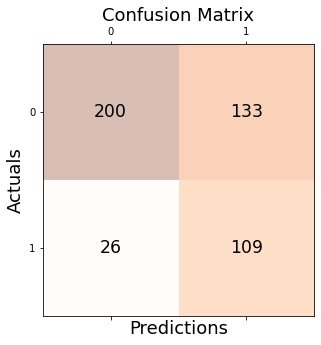

In [ ]:
model.fit(x_train_resampled,y_train_resampled)
y_pred = model.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=model.predict(X_test))
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(Y_test, y_pred))

Precision: 0.449


In [ ]:
print('Recall: %.3f' % recall_score(Y_test, y_pred))

Recall: 0.822


In [ ]:
print('Accuracy: %.3f' % accuracy_score(Y_test, y_pred))

Accuracy: 0.658


In [ ]:
print('F1 Score: %.3f' % f1_score(Y_test, y_pred))

F1 Score: 0.581


In [ ]:
from sklearn.metrics import confusion_matrix
import xgboost as xgb
my_model = xgb.XGBClassifier()
my_model.fit(x_train_resampled,y_train_resampled)
 
# Predicting the Test set results
y_pred = my_model.predict(X_test)
 


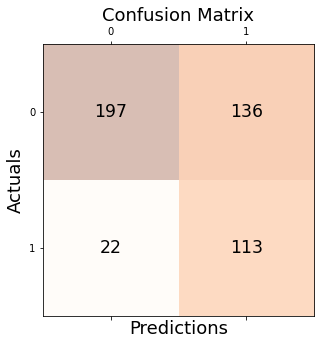

In [ ]:
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb_model = adb.fit(x_train_resampled,y_train_resampled)
y_pred=adb_model.predict(X_test)

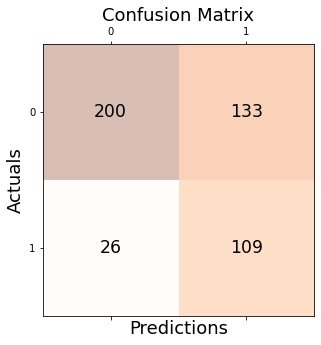

In [ ]:
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=model.predict(X_test))
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()